# Chapter 3. 통계적 실험과 유의성검정

In [118]:
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import t

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from tqdm.notebook import tqdm

path = 'c:/reposit/data/book/practicalstatistics/'

In [95]:
# 데이터 불러오기
session_times = pd.read_csv(path + 'web_page_data.csv')
four_sessions = pd.read_csv(path + 'four_sessions.csv')

## 3.1 A/B 검정

## 3.2 가설검정

## 3.3 재표본추출

### 3.3.1 순열검정

### 3.3.2 예저: 웹 점착성

<Figure size 300x300 with 0 Axes>

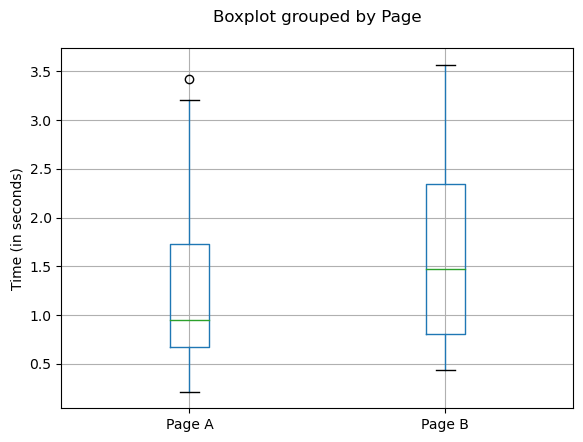

In [15]:
plt.figure(figsize=(3, 3))
ax = session_times.boxplot(by='Page', column='Time')
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
ax.set_title('')

plt.show()

In [24]:
# mean_a = session_times.loc[session_times.Page=='Page A', 'Time'].mean()
# mean_b = session_times.loc[session_times.Page=='Page B', 'Time'].mean()

mean_a = session_times.loc[session_times.Page=='Page A'].Time.mean()
mean_b = session_times.loc[session_times.Page=='Page B'].Time.mean()

mean_b - mean_a

0.3566666666666669

In [55]:
# 순열검정 구현
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    idx_A, idx_B = list(idx_A), list(idx_B)
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

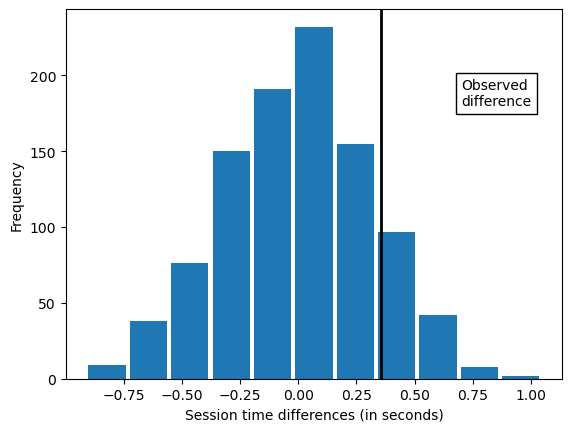

In [73]:
nA = 21
nB = 15

perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

plt.figure()
plt.hist(perm_dffs, bins=11, rwidth=.9)
plt.axvline(x=mean_b-mean_a, color='black', lw=2)
plt.text(0.7, 180, 'Observed\ndifference', bbox={'facecolor': 'white'})
plt.xlabel('Session time differences (in seconds)')
plt.ylabel('Frequency')

plt.show()

In [74]:
np.mean(np.array(perm_diffs) > mean_b - mean_a)

0.133

### 3.3.3 전체 및 부트스트랩 순열검정

### 3.3.4 순열검정: 데이터 과학의 최종 결론

## 3.4 통계적 유의성과 p값

Observed difference:  0.0368%


  0%|          | 0/1000 [00:00<?, ?it/s]

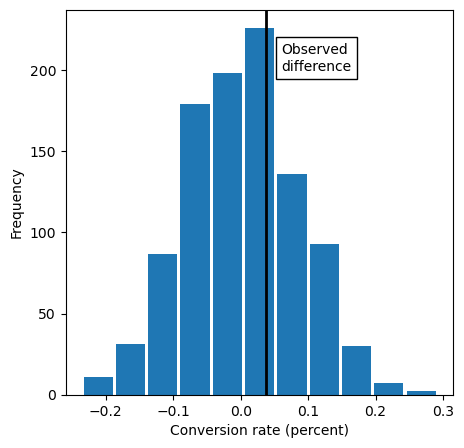

In [86]:
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588)
print(f'Observed difference: {obs_pct_diff: .4f}%')

conversion = [0] * 45945
conversion.extend([1] * 382)
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588) for _ in tqdm(range(1000))]

plt.figure(figsize=(5, 5))
plt.hist(perm_diffs, bins=11, rwidth=.9)
plt.axvline(x=obs_pct_diff, color='black', lw=2)
plt.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor': 'white'})
plt.xlabel('Conversion rate (percent)')
plt.ylabel('Frequency')

plt.show()

### 3.4.1 p 값

In [91]:
survivors = np.array([[200, 23739-200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.3498


### 3.4.2 유의수준

### 3.4.3 제1종과 제2종 오류

## 3.5 t 검정

In [92]:
res = stats.ttest_ind(session_times[session_times.Page=='Page A'].Time,
                      session_times[session_times.Page=='Page B'].Time,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.1408


## 3.6 다중검정

## 3.7 자유도

## 3.8 분산분석

In [105]:
observed_variance = four_sessions.groupby('Page').mean().var()[0]
print('Observed means: ', four_sessions.groupby('Page').mean().values.ravel())
print('Variance: ', observed_variance)

def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var()[0]

perm_variance = [perm_test(four_sessions) for _ in tqdm(range(3000))]
print('Pr(Prob)', np.mean([var > observed_variance for var in tqdm(perm_variance)]))

Observed means:  [172.8 182.6 175.6 164.6]
Variance:  55.426666666666655


  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Pr(Prob) 0.06966666666666667


### 3.8.1 F 통계량

In [119]:
model = ols('Time~Page', data=four_sessions).fit()

aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Page,3.0,831.4,277.133333,2.739825,0.077586
Residual,16.0,1618.4,101.150000,NaN,NaN


### 3.8.2 이원 분산분석

## 3.9 카이제곱검정

### 3.9.1 카이제곱검정: 재표본추출 방법

In [121]:
box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

def chi2(observed, expected):
    for row, expect in tqdm(zip(observed, expected)):
        pearson_residuals.append([(observe - expect) ** 2 / expect for observe in tqdm(row)])
        
    # 제곱의 합을 반환한다.
    return np.sum(pearson_residuals)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [34 / 3, 1000 - 34 / 3]
chi2observed = chi2(clicks.values, expected)

def perm_fun(box):
    sample_clicks = [sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000))]
    sample_noclicks = [1000 - n for n in tqdm(sample_clicks)]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in tqdm(range(2000))]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)

print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

NameError: name 'clicks' is not defined